## Things to try:
* Look at other notebooks for data preprocessing
* Look at other notebooks for data visualization
* Bet against odds ... %

## Scrape Betting data and simulate if bet according to startegy will win money

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
# loading CSV files downloaded from Kaggle
path = "data/"
df = pd.read_csv(path + "spreadspoke_scores.csv")
teams = pd.read_csv(path + "nfl_teams.csv")
games_elo = pd.read_csv(path + "nfl_elo.csv")

In [3]:
df.shape

(4750, 17)

In [4]:
df.head()

schedule_date  schedule_season schedule_week  schedule_playoff  \
0        9/9/01             2001             1             False   
1        9/9/01             2001             1             False   
2        9/9/01             2001             1             False   
3        9/9/01             2001             1             False   
4        9/9/01             2001             1             False   

           team_home  score_home  score_away             team_away  \
0   Baltimore Ravens          17           6         Chicago Bears   
1      Buffalo Bills           6          24    New Orleans Saints   
2   Cleveland Browns           6           9      Seattle Seahawks   
3     Dallas Cowboys           6          10  Tampa Bay Buccaneers   
4  Green Bay Packers          28           6         Detroit Lions   

  team_favorite_id  spread_favorite  over_under_line               stadium  \
0              BAL            -10.5             33.5      M&T Bank Stadium   
1               NO             -1.5             37.5  Ralph Wilson Stadium   
2              SEA             -4.0             38.5   FirstEnergy Stadium   
3               TB             -9.0             34.0         Texas Stadium   
4               GB             -5.5             41.5         Lambeau Field   

   stadium_neutral  weather_temperature  weather_wind_mph  weather_humidity  \
0            False                 72.0               6.0              79.0   
1            False                 80.0              12.0              58.0   
2            False                 79.0              14.0              68.0   
3            False                 75.0              13.0              78.0   
4            False                 61.0               7.0              93.0   

  weather_detail  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [5]:
teams.head()

team_name team_name_short team_id team_id_pfr team_conference  \
0  Arizona Cardinals       Cardinals     ARI         CRD             NFC   
1    Atlanta Falcons         Falcons     ATL         ATL             NFC   
2   Baltimore Ravens          Ravens     BAL         RAV             AFC   
3      Buffalo Bills           Bills     BUF         BUF             AFC   
4  Carolina Panthers        Panthers     CAR         CAR             NFC   

  team_division  
0      NFC West  
1     NFC South  
2     AFC North  
3      AFC East  
4     NFC South

In [6]:
games_elo.head()

date  season  neutral playoff team1 team2  elo1_pre  elo2_pre  elo_prob1  \
0  9/9/01    2001        0     NaN   TEN   MIA  1603.825  1568.090   0.641039   
1  9/9/01    2001        0     NaN   PHI   LAR  1546.139  1550.697   0.586116   
2  9/9/01    2001        0     NaN   BUF    NO  1521.265  1498.313   0.623937   
3  9/9/01    2001        0     NaN   CIN    NE  1380.427  1453.308   0.488660   
4  9/9/01    2001        0     NaN   CLE   SEA  1332.236  1461.802   0.408137   

   elo_prob2  elo1_post  elo2_post  score1  score2  
0   0.358961   1574.303   1597.611      23      31  
1   0.413884   1529.430   1567.407      17      20  
2   0.376063   1482.992   1536.586       6      24  
3   0.511340   1400.399   1433.336      23      17  
4   0.591863   1321.242   1472.795       6       9

# Create new features 
- Current W-L %
- Last season W-L %

In [5]:
# mapping team_id to the correct teams
df['team_home'] = df.team_home.map(teams.set_index('team_name')['team_id'].to_dict())
df['team_away'] = df.team_away.map(teams.set_index('team_name')['team_id'].to_dict())

In [36]:
query_df = df[((df.team_home == "MIN") | (df.team_away == "MIN")) & (df.schedule_season == 2001)]
for week in range(1,18):
    wins, games_played = 0, 0
    current_game = df[((df.team_home == "MIN") | (df.team_away == "MIN")) & (df.schedule_season == 2001) & (df.schedule_week == str(week))]
#     print(current_game.team_home)

In [46]:
for team in teams.team_id.unique().tolist():
    for season in range(2001,2019): 
        for week in range(1,18):
            wins, games_played = 0, 0
            current_game = df[((df.team_home == team) | (df.team_away == team)) & (df.schedule_season == season) & (df.schedule_week == str(week))]
            # if week 17 put current in next season

Empty DataFrame
Columns: [schedule_date, schedule_season, schedule_week, schedule_playoff, team_home, score_home, score_away, team_away, team_favorite_id, spread_favorite, over_under_line, stadium, stadium_neutral, weather_temperature, weather_wind_mph, weather_humidity, weather_detail]
Index: []
   schedule_date  schedule_season schedule_week  schedule_playoff team_home  \
14       9/23/01             2001             2             False       ARI   

    score_home  score_away team_away team_favorite_id  spread_favorite  \
14          17          38       DEN              DEN             -8.5   

    over_under_line                        stadium  stadium_neutral  \
14             45.0  University of Phoenix Stadium            False   

    weather_temperature  weather_wind_mph  weather_humidity weather_detail  
14                 91.0               6.0              18.0            NaN  
   schedule_date  schedule_season schedule_week  schedule_playoff team_home  \
28       9/30/01  

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



    schedule_date  schedule_season schedule_week  schedule_playoff team_home  \
547       9/14/03             2003             2             False       OAK   

     score_home  score_away team_away team_favorite_id  spread_favorite  \
547          23          20       CIN              OAK            -12.0   

     over_under_line           stadium  stadium_neutral  weather_temperature  \
547             45.0  Oakland Coliseum            False                 66.0   

     weather_wind_mph  weather_humidity weather_detail  
547              11.0              77.0            NaN  
    schedule_date  schedule_season schedule_week  schedule_playoff team_home  \
566       9/22/03             2003             3             False       DEN   

     score_home  score_away team_away team_favorite_id  spread_favorite  \
566          31          10       OAK              DEN             -5.5   

     over_under_line                              stadium  stadium_neutral  \
566             45.0  S

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/ukritw/miniconda3/envs/machine_learning/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-47-6f3fe1741441>", line 5, in <module>
    current_game = df[((df.team_home == team) | (df.team_away == team)) & (df.schedule_season == season) & (df.schedule_week == str(week))]
  File "/Users/ukritw/miniconda3/envs/machine_learning/lib/python3.6/site-packages/pandas/core/ops.py", line 1291, in wrapper
    name=res_name, dtype='bool')
  File "/Users/ukritw/miniconda3/envs/machine_learning/lib/python3.6/site-packages/pandas/core/series.py", line 275, in __init__
    raise_cast_failure=True)
  File "/Users/ukritw/miniconda3/envs/machine_learning/lib/python3.6/site-packages/pandas/core/series.py", line 4086, in _sanitize_array
    subarr = _try_cast(data, True)
  File "/Users/ukritw/miniconda3/envs/machine_learning/lib/python3.6/site-packa

TypeError: must be str, not list

## Combine data into one dataframe
**Note: use merge to join dataframe**
1. df - add team_id for home and away (data from teams)
2. df - add ELO prob for home and away 

In [7]:
df.team_home.describe()

count                     4750
unique                      32
top       New England Patriots
freq                       171
Name: team_home, dtype: object

In [8]:
df.team_away.describe()

count                 4750
unique                  32
top       Seattle Seahawks
freq                   156
Name: team_away, dtype: object

In [9]:
df.team_favorite_id.describe()

count     4750
unique      32
top         NE
freq       263
Name: team_favorite_id, dtype: object

In [10]:
# mapping team_id to the correct teams
df['team_home'] = df.team_home.map(teams.set_index('team_name')['team_id'].to_dict())
df['team_away'] = df.team_away.map(teams.set_index('team_name')['team_id'].to_dict())

In [11]:
# Get division info. in each team to create 'division_game' flag

In [12]:
new_df = pd.merge(df, teams[["team_id", "team_division"]], how='inner', left_on=['team_home'], right_on=['team_id'])
new_df = pd.merge(new_df, teams[["team_id", "team_division"]], how='inner', left_on=['team_away'], right_on=['team_id'])
new_df = new_df.rename(columns={'team_division_x': 'team_home_division', 'team_division_y': 'team_away_division'})

# drop unused columns
new_df = new_df.drop(['team_id_x', 'team_id_y'], axis=1)

new_df["division_game"] = new_df["team_home_division"] == new_df["team_away_division"]

In [13]:
new_df.head()

schedule_date  schedule_season schedule_week  schedule_playoff team_home  \
0        9/9/01             2001             1             False       BAL   
1      12/20/09             2009            15             False       BAL   
2      10/15/17             2017             6             False       BAL   
3       9/29/02             2002             4             False       BUF   
4       11/7/10             2010             9             False       BUF   

   score_home  score_away team_away team_favorite_id  spread_favorite  \
0          17           6       CHI              BAL            -10.5   
1          31           7       CHI              BAL            -11.0   
2          24          27       CHI              BAL             -6.5   
3          33          27       CHI              BUF             -3.0   
4          19          22       CHI              CHI             -3.0   

   over_under_line               stadium  stadium_neutral  \
0             33.5      M&T Bank Stadium            False   
1             39.0      M&T Bank Stadium            False   
2             38.5      M&T Bank Stadium            False   
3             46.5  Ralph Wilson Stadium            False   
4             41.5         Rogers Centre             True   

   weather_temperature  weather_wind_mph  weather_humidity weather_detail  \
0                 72.0               6.0              79.0            NaN   
1                 30.0              12.0              68.0            NaN   
2                 73.0              10.0               NaN            NaN   
3                 57.0               9.0              76.0            NaN   
4                 72.0               0.0               NaN           DOME   

  team_home_division team_away_division  division_game  
0          AFC North          NFC North          False  
1          AFC North          NFC North          False  
2          AFC North          NFC North          False  
3           AFC East          NFC North          False  
4           AFC East          NFC North          False

In [14]:
new_df.division_game.describe()

count      4750
unique        2
top       False
freq       3042
Name: division_game, dtype: object

### Merge elo data

In [15]:
new_df = pd.merge(df, teams[["team_id", "team_division"]], how='inner', left_on=['team_home'], right_on=['team_id'])
new_df = pd.merge(new_df, teams[["team_id", "team_division"]], how='inner', left_on=['team_away'], right_on=['team_id'])
new_df = new_df.rename(columns={'team_division_x': 'team_home_division', 'team_division_y': 'team_away_division'})

# drop unused columns
new_df = new_df.drop(['team_id_x', 'team_id_y'], axis=1)

new_df["division_game"] = new_df["team_home_division"] == new_df["team_away_division"]

# change data type of date columns
new_df['schedule_date'] = pd.to_datetime(new_df['schedule_date'])
games_elo['date'] = pd.to_datetime(games_elo['date'])

In [16]:
new_df = new_df.merge(games_elo[['date', 'team1', 'team2', 'elo_prob1', 'elo_prob2']], left_on=['schedule_date', 'team_home', 'team_away'], right_on=['date', 'team1', 'team2'], how='left')

In [17]:
new_df.head()

schedule_date  schedule_season schedule_week  schedule_playoff team_home  \
0    2001-09-09             2001             1             False       BAL   
1    2009-12-20             2009            15             False       BAL   
2    2017-10-15             2017             6             False       BAL   
3    2002-09-29             2002             4             False       BUF   
4    2010-11-07             2010             9             False       BUF   

   score_home  score_away team_away team_favorite_id  spread_favorite  \
0          17           6       CHI              BAL            -10.5   
1          31           7       CHI              BAL            -11.0   
2          24          27       CHI              BAL             -6.5   
3          33          27       CHI              BUF             -3.0   
4          19          22       CHI              CHI             -3.0   

     ...      weather_humidity weather_detail  team_home_division  \
0    ...                  79.0            NaN           AFC North   
1    ...                  68.0            NaN           AFC North   
2    ...                   NaN            NaN           AFC North   
3    ...                  76.0            NaN            AFC East   
4    ...                   NaN           DOME            AFC East   

   team_away_division  division_game       date team1 team2 elo_prob1  \
0           NFC North          False 2001-09-09   BAL   CHI  0.847023   
1           NFC North          False 2009-12-20   BAL   CHI  0.781479   
2           NFC North          False 2017-10-15   BAL   CHI  0.751455   
3           NFC North          False 2002-09-29   BUF   CHI  0.401823   
4           NFC North          False 2010-11-07   BUF   CHI  0.421488   

   elo_prob2  
0   0.152977  
1   0.218521  
2   0.248545  
3   0.598177  
4   0.578512  

[5 rows x 25 columns]

In [18]:
# merge to fix neutral games where team_home and team_away are switched
games_elo2 = games_elo.rename(columns={'team1' : 'team2', 
                                       'team2' : 'team1', 
                                       'elo1' : 'elo2', 
                                       'elo2' : 'elo1',
                                       'elo_prob1' : 'elo_prob2', 
                                       'elo_prob2' : 'elo_prob1'})
# games_elo2 = games_elo.rename(columns={'team1' : 'team2', 'team2' : 'team1', 'elo1' : 'elo2', 'elo2' : 'elo1'})

In [19]:
# new_df = new_df.merge(games_elo, left_on=['schedule_date', 'team_home', 'team_away'], right_on=['date', 'team1', 'team2'], how='left')
# new_df = new_df.merge(games_elo2, left_on=['schedule_date', 'team_home', 'team_away'], right_on=['date', 'team1', 'team2'], how='left')
new_df = new_df.merge(games_elo2[['date', 'team1', 'team2', 'elo_prob1', 'elo_prob2']], left_on=['schedule_date', 'team_home', 'team_away'], right_on=['date', 'team1', 'team2'], how='left')
new_df.head()

schedule_date  schedule_season schedule_week  schedule_playoff team_home  \
0    2001-09-09             2001             1             False       BAL   
1    2009-12-20             2009            15             False       BAL   
2    2017-10-15             2017             6             False       BAL   
3    2002-09-29             2002             4             False       BUF   
4    2010-11-07             2010             9             False       BUF   

   score_home  score_away team_away team_favorite_id  spread_favorite  \
0          17           6       CHI              BAL            -10.5   
1          31           7       CHI              BAL            -11.0   
2          24          27       CHI              BAL             -6.5   
3          33          27       CHI              BUF             -3.0   
4          19          22       CHI              CHI             -3.0   

      ...          date_x team1_x  team2_x  elo_prob1_x  elo_prob2_x  date_y  \
0     ...      2001-09-09     BAL      CHI     0.847023     0.152977     NaT   
1     ...      2009-12-20     BAL      CHI     0.781479     0.218521     NaT   
2     ...      2017-10-15     BAL      CHI     0.751455     0.248545     NaT   
3     ...      2002-09-29     BUF      CHI     0.401823     0.598177     NaT   
4     ...      2010-11-07     BUF      CHI     0.421488     0.578512     NaT   

  team1_y team2_y elo_prob1_y  elo_prob2_y  
0     NaN     NaN         NaN          NaN  
1     NaN     NaN         NaN          NaN  
2     NaN     NaN         NaN          NaN  
3     NaN     NaN         NaN          NaN  
4     NaN     NaN         NaN          NaN  

[5 rows x 30 columns]

In [20]:
new_df.columns.values

array(['schedule_date', 'schedule_season', 'schedule_week',
       'schedule_playoff', 'team_home', 'score_home', 'score_away',
       'team_away', 'team_favorite_id', 'spread_favorite',
       'over_under_line', 'stadium', 'stadium_neutral',
       'weather_temperature', 'weather_wind_mph', 'weather_humidity',
       'weather_detail', 'team_home_division', 'team_away_division',
       'division_game', 'date_x', 'team1_x', 'team2_x', 'elo_prob1_x',
       'elo_prob2_x', 'date_y', 'team1_y', 'team2_y', 'elo_prob1_y',
       'elo_prob2_y'], dtype=object)

In [21]:
# new_df[new_df["elo_prob1"].isnull()]

In [22]:
# separating merged columns into x and y cols
x_cols = ['date_x', 'team1_x', 'team2_x', 'elo_prob1_x', 'elo_prob2_x']
y_cols = ['date_y', 'team1_y', 'team2_y', 'elo_prob1_y','elo_prob2_y']

# filling null values for games_elo merged cols
for x, y in zip(x_cols, y_cols):
    new_df[x] = new_df[x].fillna(new_df[y]) 

# removing y_cols from dataframe    
new_df = new_df[['schedule_date', 'schedule_season', 'schedule_week',
       'schedule_playoff', 'team_home', 'score_home', 'score_away',
       'team_away', 'team_favorite_id', 'spread_favorite',
       'over_under_line', 'stadium', 'stadium_neutral',
       'weather_temperature', 'weather_wind_mph', 'weather_humidity',
       'weather_detail', 'team_home_division', 'team_away_division',
       'division_game', 'date_x', 'team1_x', 'team2_x', 'elo_prob1_x',
       'elo_prob2_x']]

# remove _x ending from column names
new_df.columns = new_df.columns.str.replace('_x', '')

In [23]:
new_df.head()

schedule_date  schedule_season schedule_week  schedule_playoff team_home  \
0    2001-09-09             2001             1             False       BAL   
1    2009-12-20             2009            15             False       BAL   
2    2017-10-15             2017             6             False       BAL   
3    2002-09-29             2002             4             False       BUF   
4    2010-11-07             2010             9             False       BUF   

   score_home  score_away team_away team_favorite_id  spread_favorite  \
0          17           6       CHI              BAL            -10.5   
1          31           7       CHI              BAL            -11.0   
2          24          27       CHI              BAL             -6.5   
3          33          27       CHI              BUF             -3.0   
4          19          22       CHI              CHI             -3.0   

     ...      weather_humidity weather_detail  team_home_division  \
0    ...                  79.0            NaN           AFC North   
1    ...                  68.0            NaN           AFC North   
2    ...                   NaN            NaN           AFC North   
3    ...                  76.0            NaN            AFC East   
4    ...                   NaN           DOME            AFC East   

   team_away_division  division_game       date team1 team2 elo_prob1  \
0           NFC North          False 2001-09-09   BAL   CHI  0.847023   
1           NFC North          False 2009-12-20   BAL   CHI  0.781479   
2           NFC North          False 2017-10-15   BAL   CHI  0.751455   
3           NFC North          False 2002-09-29   BUF   CHI  0.401823   
4           NFC North          False 2010-11-07   BUF   CHI  0.421488   

   elo_prob2  
0   0.152977  
1   0.218521  
2   0.248545  
3   0.598177  
4   0.578512  

[5 rows x 25 columns]

In [24]:
new_df.elo_prob1.describe()

count    4460.000000
mean        0.583040
std         0.170068
min         0.092782
25%         0.465182
50%         0.593258
75%         0.711751
max         0.964578
Name: elo_prob1, dtype: float64

In [25]:
# Drop column where there are eno Elo information
new_df = new_df.dropna(subset=['elo_prob1', 'elo_prob2'])

In [26]:
# creating result column df.loc[(df.score_home > df.score_away), 'result'
new_df['result'] = (new_df.score_home > new_df.score_away).astype(int)

In [27]:
new_df.shape

(4460, 26)

## Exploratory Data Analysis

In [28]:
new_df.columns.values

array(['schedule_date', 'schedule_season', 'schedule_week',
       'schedule_playoff', 'team_home', 'score_home', 'score_away',
       'team_away', 'team_favorite_id', 'spread_favorite',
       'over_under_line', 'stadium', 'stadium_neutral',
       'weather_temperature', 'weather_wind_mph', 'weather_humidity',
       'weather_detail', 'team_home_division', 'team_away_division',
       'division_game', 'date', 'team1', 'team2', 'elo_prob1', 'elo_prob2',
       'result'], dtype=object)

In [29]:
new_df.head()

schedule_date  schedule_season schedule_week  schedule_playoff team_home  \
0    2001-09-09             2001             1             False       BAL   
1    2009-12-20             2009            15             False       BAL   
2    2017-10-15             2017             6             False       BAL   
3    2002-09-29             2002             4             False       BUF   
4    2010-11-07             2010             9             False       BUF   

   score_home  score_away team_away team_favorite_id  spread_favorite   ...    \
0          17           6       CHI              BAL            -10.5   ...     
1          31           7       CHI              BAL            -11.0   ...     
2          24          27       CHI              BAL             -6.5   ...     
3          33          27       CHI              BUF             -3.0   ...     
4          19          22       CHI              CHI             -3.0   ...     

   weather_detail team_home_division  team_away_division  division_game  \
0             NaN          AFC North           NFC North          False   
1             NaN          AFC North           NFC North          False   
2             NaN          AFC North           NFC North          False   
3             NaN           AFC East           NFC North          False   
4            DOME           AFC East           NFC North          False   

        date  team1 team2 elo_prob1 elo_prob2  result  
0 2001-09-09    BAL   CHI  0.847023  0.152977       1  
1 2009-12-20    BAL   CHI  0.781479  0.218521       1  
2 2017-10-15    BAL   CHI  0.751455  0.248545       0  
3 2002-09-29    BUF   CHI  0.401823  0.598177       1  
4 2010-11-07    BUF   CHI  0.421488  0.578512       0  

[5 rows x 26 columns]

In [30]:
new_df.describe().transpose()

count         mean        std          min          25%  \
schedule_season      4460.0  2009.506951   5.170360  2001.000000  2005.000000   
score_home           4460.0    23.356726  10.424167     0.000000    16.000000   
score_away           4460.0    20.693498  10.085172     0.000000    13.000000   
spread_favorite      4460.0    -5.461771   3.395551   -26.500000    -7.000000   
over_under_line      4460.0    43.291928   4.895715    30.000000    40.000000   
weather_temperature  4353.0    60.778773  15.630705    -6.000000    50.000000   
weather_wind_mph     4353.0     6.216173   5.462556     0.000000     0.000000   
weather_humidity     2228.0    65.045781  16.761103     4.000000    54.000000   
elo_prob1            4460.0     0.583040   0.170068     0.092782     0.465182   
elo_prob2            4460.0     0.416960   0.170068     0.035422     0.288249   
result               4460.0     0.575336   0.494347     0.000000     0.000000   

                             50%          75%          max  
schedule_season      2010.000000  2014.000000  2018.000000  
score_home             23.000000    30.000000    62.000000  
score_away             20.000000    27.000000    59.000000  
spread_favorite        -4.500000    -3.000000    -1.000000  
over_under_line        43.500000    46.500000    63.500000  
weather_temperature    65.000000    72.000000    97.000000  
weather_wind_mph        6.000000    10.000000    40.000000  
weather_humidity       67.000000    77.000000   100.000000  
elo_prob1               0.593258     0.711751     0.964578  
elo_prob2               0.406742     0.534818     0.907218  
result                  1.000000     1.000000     1.000000

In [31]:
# null values by column
new_df.isnull().sum(axis=0)

schedule_date             0
schedule_season           0
schedule_week             0
schedule_playoff          0
team_home                 0
score_home                0
score_away                0
team_away                 0
team_favorite_id          0
spread_favorite           0
over_under_line           0
stadium                   0
stadium_neutral           0
weather_temperature     107
weather_wind_mph        107
weather_humidity       2232
weather_detail         3171
team_home_division        0
team_away_division        0
division_game             0
date                      0
team1                     0
team2                     0
elo_prob1                 0
elo_prob2                 0
result                    0
dtype: int64

In [32]:
df = new_df

In [33]:
# creating home favorite and away favorite columns (fill na with 0's)
df.loc[df.team_favorite_id == df.team_home, 'home_favorite'] = 1
df.loc[df.team_favorite_id == df.team_away, 'away_favorite'] = 1
df.home_favorite.fillna(0, inplace=True)
df.away_favorite.fillna(0, inplace=True)

# fixing some schedule_week column errors and converting column to integer data type
df.loc[(df.schedule_week == '18'), 'schedule_week'] = '17'
df.loc[(df.schedule_week == 'Wildcard') | (df.schedule_week == 'WildCard'), 'schedule_week'] = '18'
df.loc[(df.schedule_week == 'Division'), 'schedule_week'] = '19'
df.loc[(df.schedule_week == 'Conference'), 'schedule_week'] = '20'
df.loc[(df.schedule_week == 'Superbowl') | (df.schedule_week == 'SuperBowl'), 'schedule_week'] = '21'
df['schedule_week'] = df.schedule_week.astype(int)

In [34]:
# some percentages to take into consideration when betting
# home_win = "{:.2f}".format((sum((df.result == 1) & (df.stadium_neutral == 0)) / len(df)) * 100)
home_win = "{:.2f}".format((sum((df.result == 1) & (df.stadium_neutral == 0)) / sum(df.stadium_neutral == 0)) * 100)
# away_win = "{:.2f}".format((sum((df.result == 0) & (df.stadium_neutral == 0)) / len(df)) * 100)
away_win = "{:.2f}".format((sum((df.result == 0) & (df.stadium_neutral == 0)) / sum(df.stadium_neutral == 0)) * 100)

under_line = "{:.2f}".format((sum((df.score_home + df.score_away) < df.over_under_line) / len(df)) * 100)
over_line = "{:.2f}".format((sum((df.score_home + df.score_away) > df.over_under_line) / len(df)) * 100)
equal_line = "{:.2f}".format((sum((df.score_home + df.score_away) == df.over_under_line) / len(df)) * 100)

favored = "{:.2f}".format((sum(((df.home_favorite == 1) & (df.result == 1)) | ((df.away_favorite == 1) & (df.result == 0)))
                           / len(df)) * 100)


cover = "{:.2f}".format((sum(((df.home_favorite == 1) & ((df.score_away - df.score_home) < df.spread_favorite)) | 
                             ((df.away_favorite == 1) & ((df.score_home - df.score_away) < df.spread_favorite))) # use score_home - score_away because the fav are swap
                         / len(df)) * 100)

ats = "{:.2f}".format((sum(((df.home_favorite == 1) & ((df.score_away - df.score_home) > df.spread_favorite)) | 
                           ((df.away_favorite == 1) & ((df.score_home - df.score_away) > df.spread_favorite))) 
                       / len(df)) * 100)

In [35]:
# print all percentages
print("Number of Games: " + str(len(df)))
print("Home Straight Up Win Percentage: " + home_win + "%")
print("Away Straight Up Win Percentage: " + away_win + "%")
print("Under Percentage: " + under_line + "%")
print("Over Percentage: " + over_line + "%")
print("Equal Percentage: " + equal_line + "%")
print("Favored Win Percentage: " + favored + "%")
print("Cover The Spread Percentage: " + cover + "%")
print("Against The Spread Percentage: " + ats + "%")

Number of Games: 4460
Home Straight Up Win Percentage: 57.79%
Away Straight Up Win Percentage: 42.21%
Under Percentage: 49.48%
Over Percentage: 48.79%
Equal Percentage: 1.73%
Favored Win Percentage: 66.84%
Cover The Spread Percentage: 47.67%
Against The Spread Percentage: 49.46%


In [36]:
pd.set_option('display.max_columns', 500)
df.head()

schedule_date  schedule_season  schedule_week  schedule_playoff team_home  \
0    2001-09-09             2001              1             False       BAL   
1    2009-12-20             2009             15             False       BAL   
2    2017-10-15             2017              6             False       BAL   
3    2002-09-29             2002              4             False       BUF   
4    2010-11-07             2010              9             False       BUF   

   score_home  score_away team_away team_favorite_id  spread_favorite  \
0          17           6       CHI              BAL            -10.5   
1          31           7       CHI              BAL            -11.0   
2          24          27       CHI              BAL             -6.5   
3          33          27       CHI              BUF             -3.0   
4          19          22       CHI              CHI             -3.0   

   over_under_line               stadium  stadium_neutral  \
0             33.5      M&T Bank Stadium            False   
1             39.0      M&T Bank Stadium            False   
2             38.5      M&T Bank Stadium            False   
3             46.5  Ralph Wilson Stadium            False   
4             41.5         Rogers Centre             True   

   weather_temperature  weather_wind_mph  weather_humidity weather_detail  \
0                 72.0               6.0              79.0            NaN   
1                 30.0              12.0              68.0            NaN   
2                 73.0              10.0               NaN            NaN   
3                 57.0               9.0              76.0            NaN   
4                 72.0               0.0               NaN           DOME   

  team_home_division team_away_division  division_game       date team1 team2  \
0          AFC North          NFC North          False 2001-09-09   BAL   CHI   
1          AFC North          NFC North          False 2009-12-20   BAL   CHI   
2          AFC North          NFC North          False 2017-10-15   BAL   CHI   
3           AFC East          NFC North          False 2002-09-29   BUF   CHI   
4           AFC East          NFC North          False 2010-11-07   BUF   CHI   

   elo_prob1  elo_prob2  result  home_favorite  away_favorite  
0   0.847023   0.152977       1            1.0            0.0  
1   0.781479   0.218521       1            1.0            0.0  
2   0.751455   0.248545       0            1.0            0.0  
3   0.401823   0.598177       1            1.0            0.0  
4   0.421488   0.578512       0            0.0            1.0

# Data Visualization

In [76]:
import seaborn as sns

/Users/ukritw/miniconda3/envs/machine_learning/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/ukritw/miniconda3/envs/machine_learning/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/ukritw/miniconda3/envs/machine_learning/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/ukritw/miniconda3/envs/machine_learning/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/ukritw/miniconda3/envs/machine_learning/lib/python3

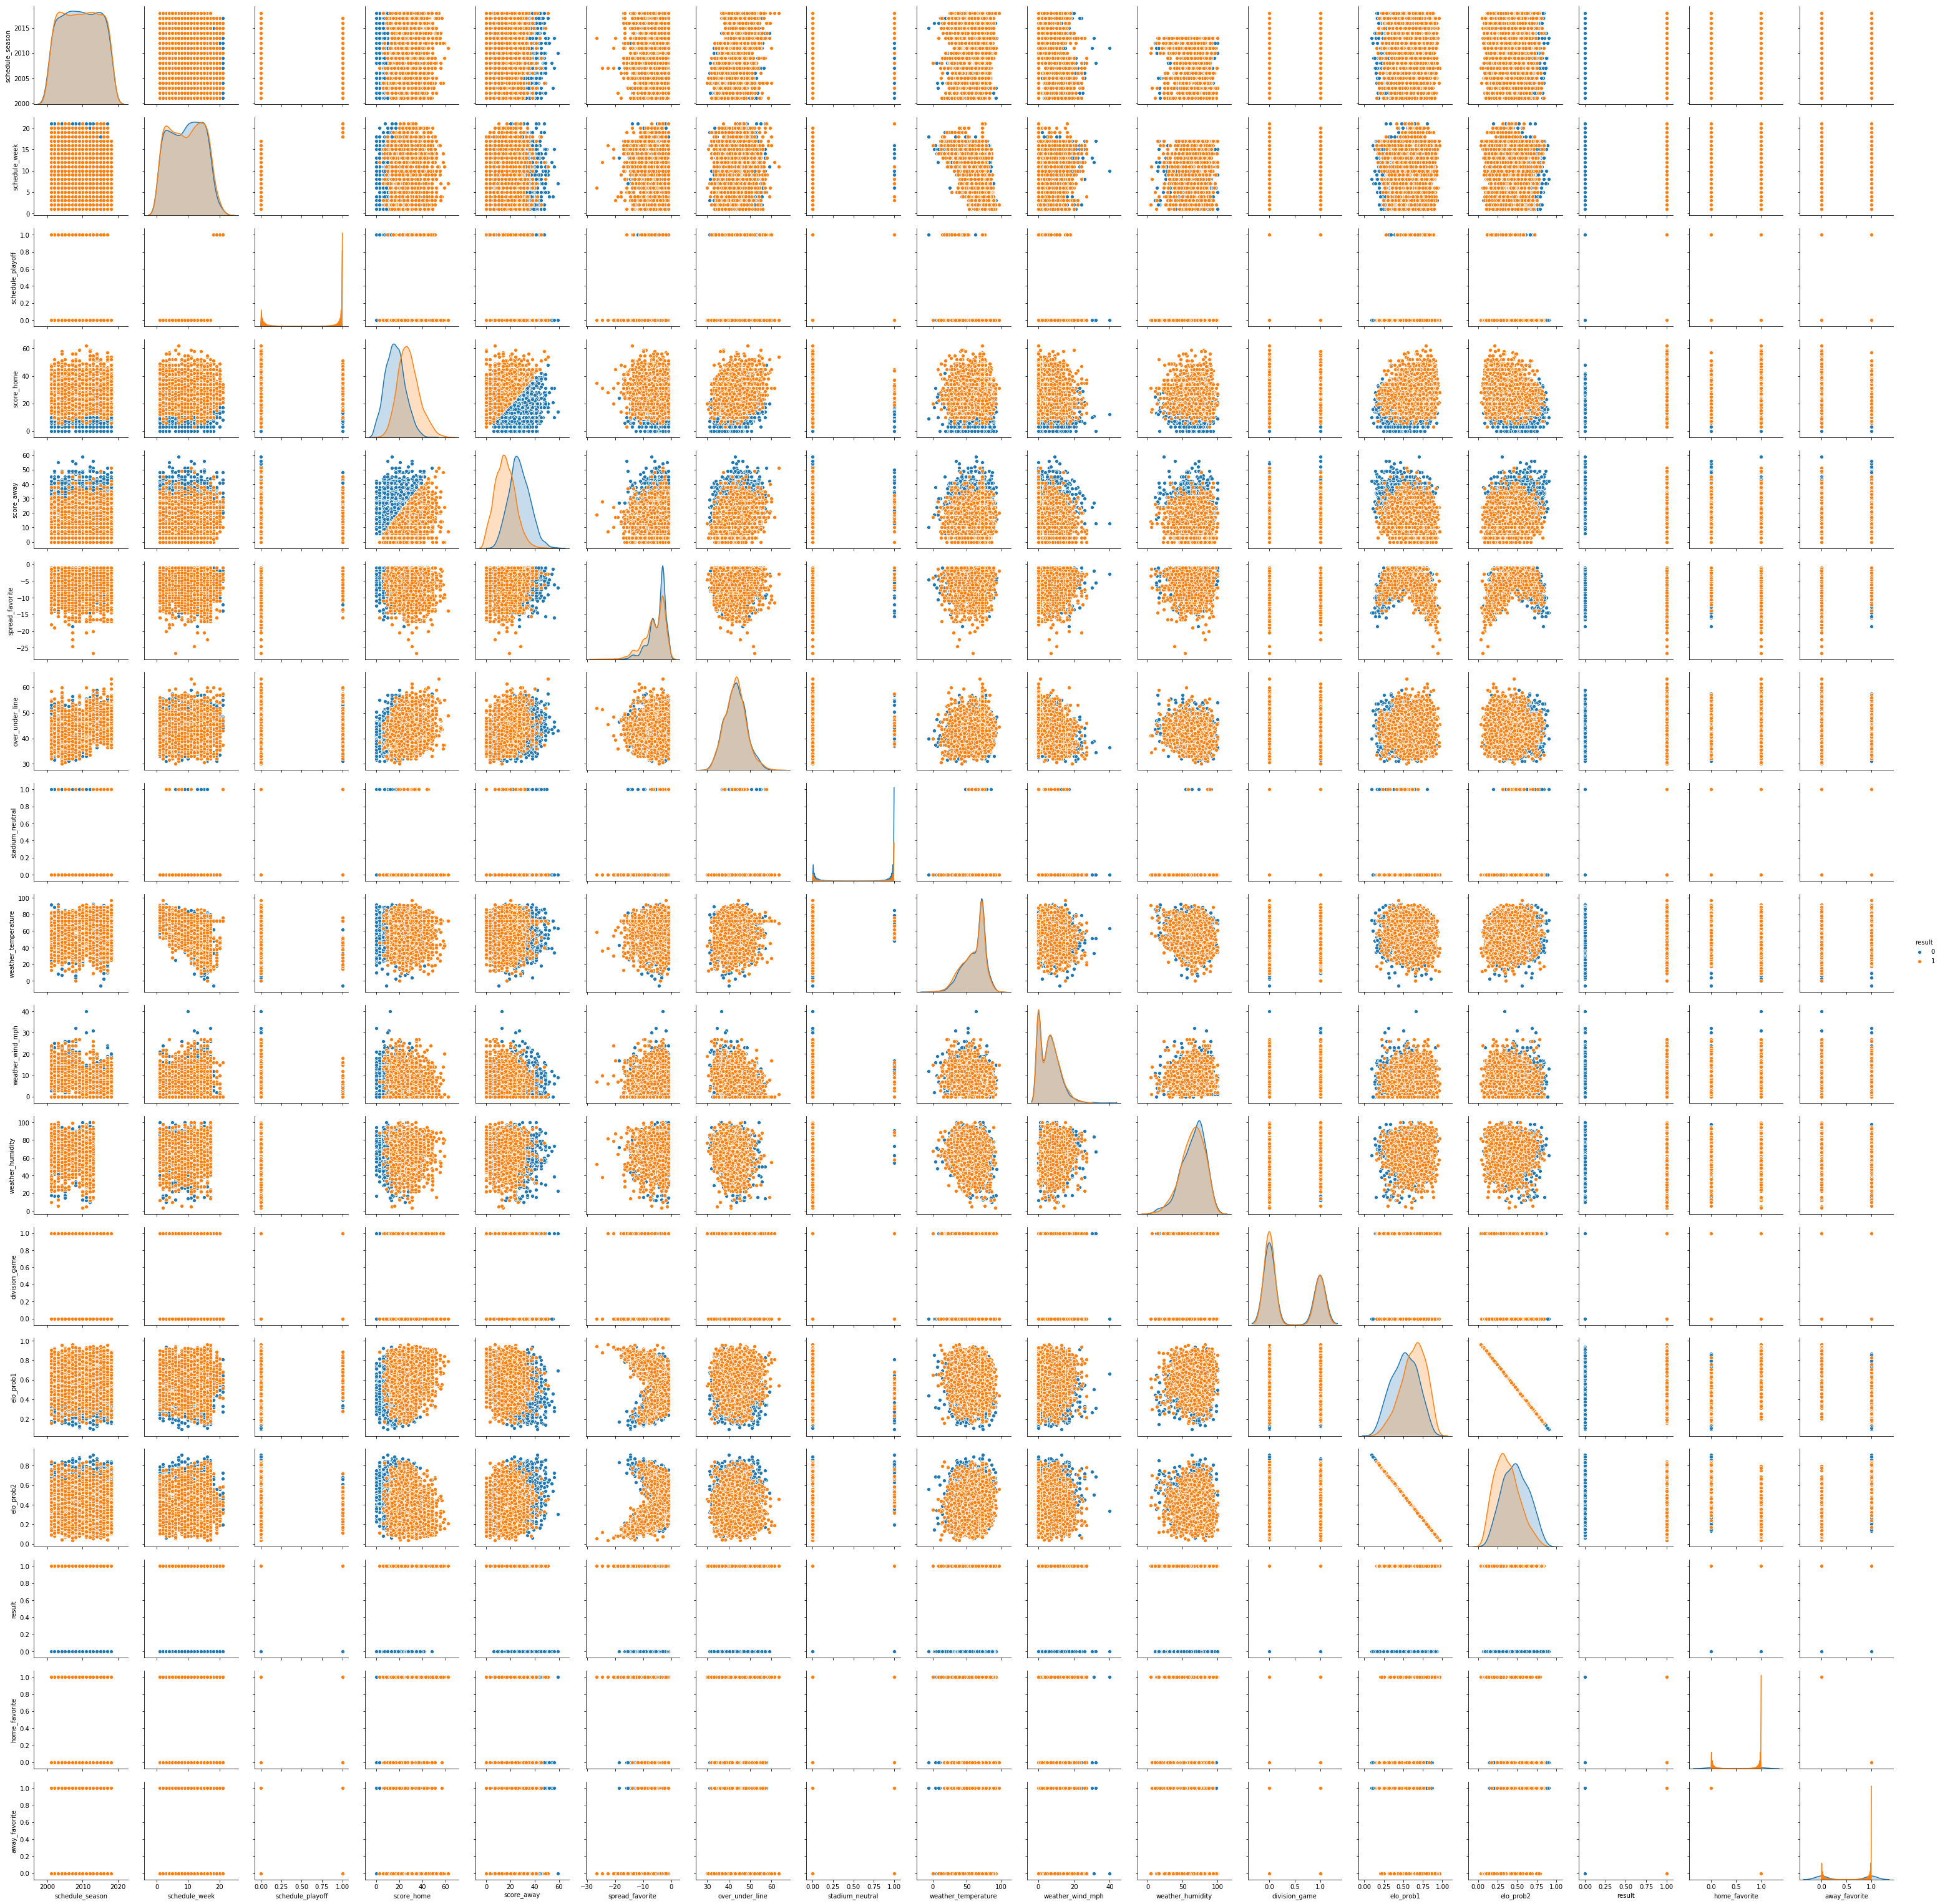

In [77]:
sns.pairplot(df, hue='result', height=2.5);

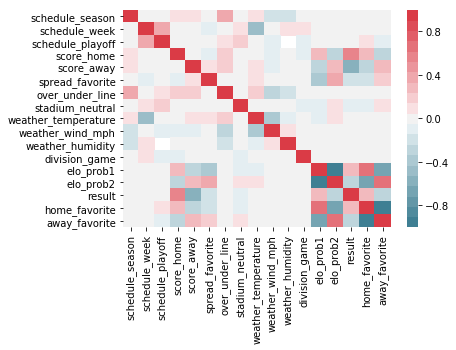

In [85]:
ax2 = sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap=sns.diverging_palette(h_neg=220,h_pos=10,n=21))

# Feature and Model Testing 
## Predict probability the the Home team will win p(y=1; x)

In [37]:
df.columns.values

array(['schedule_date', 'schedule_season', 'schedule_week',
       'schedule_playoff', 'team_home', 'score_home', 'score_away',
       'team_away', 'team_favorite_id', 'spread_favorite',
       'over_under_line', 'stadium', 'stadium_neutral',
       'weather_temperature', 'weather_wind_mph', 'weather_humidity',
       'weather_detail', 'team_home_division', 'team_away_division',
       'division_game', 'date', 'team1', 'team2', 'elo_prob1', 'elo_prob2',
       'result', 'home_favorite', 'away_favorite'], dtype=object)

In [38]:
# Change boolean column to 0/1
df.division_game = df.division_game.astype(int)
df.home_favorite = df.home_favorite.astype(int)
df.away_favorite = df.away_favorite.astype(int)

In [39]:
# initial features possible for model
# X = df[['schedule_season', 'schedule_week', 'over_under_line', 'spread_favorite', 'weather_temperature', 'weather_wind_mph',
#         'home_favorite', 'hm_avg_pts_diff','aw_avg_pts_diff', 'elo1', 'elo2', 'elo_prob1']]
X = df[['schedule_week', 'spread_favorite', 'division_game', 'elo_prob1', 'elo_prob2', 'home_favorite', 'away_favorite']]

y = df['result']

In [40]:
X.describe().transpose()

count      mean       std        min       25%        50%  \
schedule_week    4460.0  9.510314  5.275639   1.000000  5.000000  10.000000   
spread_favorite  4460.0 -5.461771  3.395551 -26.500000 -7.000000  -4.500000   
division_game    4460.0  0.358969  0.479752   0.000000  0.000000   0.000000   
elo_prob1        4460.0  0.583040  0.170068   0.092782  0.465182   0.593258   
elo_prob2        4460.0  0.416960  0.170068   0.035422  0.288249   0.406742   
result           4460.0  0.575336  0.494347   0.000000  0.000000   1.000000   
home_favorite    4460.0  0.671076  0.469875   0.000000  0.000000   1.000000   
away_favorite    4460.0  0.328924  0.469875   0.000000  0.000000   0.000000   

                       75%        max  
schedule_week    14.000000  21.000000  
spread_favorite  -3.000000  -1.000000  
division_game     1.000000   1.000000  
elo_prob1         0.711751   0.964578  
elo_prob2         0.534818   0.907218  
result            1.000000   1.000000  
home_favorite     1.000000   1.000000  
away_favorite     1.000000   1.000000

In [41]:
# required machine learning packages
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.metrics import brier_score_loss, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV as CCV

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
import xgboost as xgb

In [54]:
# training and testing data (2017 and 2018)
train = df.copy()
test = df.copy()
train = train.loc[train['schedule_season'] < 2016]
test = test.loc[test['schedule_season'] > 2015]
X_train = train[['schedule_week', 'spread_favorite', 'division_game', 'elo_prob1', 'elo_prob2', 'home_favorite', 'away_favorite']]
y_train = train['result']
X_test = test[['schedule_week', 'spread_favorite', 'division_game', 'elo_prob1', 'elo_prob2', 'home_favorite', 'away_favorite']]
y_test = test['result']

In [72]:
X

schedule_week  spread_favorite  division_game  elo_prob1  elo_prob2  \
0                 1            -10.5              0   0.847023   0.152977   
1                15            -11.0              0   0.781479   0.218521   
2                 6             -6.5              0   0.751455   0.248545   
3                 4             -3.0              0   0.401823   0.598177   
4                 9             -3.0              0   0.421488   0.578512   
5                 9            -10.5              0   0.462368   0.537632   
6                 5             -3.0              0   0.584962   0.415038   
7                15             -1.0              0   0.368432   0.631568   
8                12             -3.5              0   0.503542   0.496458   
9                 2             -7.0              0   0.701583   0.298417   
10                4             -3.0              0   0.567030   0.432970   
11                3             -6.5              0   0.667951   0.332049   
12               13             -5.5              1   0.652719   0.347281   
13               13             -9.5              1   0.809019   0.190981   
14               14             -7.5              1   0.715452   0.284548   
15                2             -9.0              1   0.801562   0.198438   
16               16             -7.0              1   0.408888   0.591112   
17                1             -3.5              1   0.520028   0.479972   
18                5             -3.5              1   0.697422   0.302578   
19               11             -3.5              1   0.623483   0.376517   
20                1             -5.0              1   0.560913   0.439087   
21               17            -10.5              1   0.630411   0.369589   
22               16            -13.0              1   0.862371   0.137629   
23                2             -5.5              1   0.708227   0.291773   
24                9             -9.5              1   0.747187   0.252813   
25               10             -9.5              1   0.717771   0.282229   
26               12             -8.0              1   0.831649   0.168351   
27                7             -7.5              1   0.805578   0.194422   
28                4             -7.5              1   0.820676   0.179324   
29                1             -6.5              1   0.630539   0.369461   
...             ...              ...            ...        ...        ...   
4720             17             -8.0              1   0.721151   0.278849   
4721              1             -4.0              1   0.690390   0.309610   
4722             16             -5.0              1   0.727991   0.272009   
4723              8             -8.5              1   0.797450   0.202550   
4724             16             -4.0              1   0.557378   0.442622   
4725              9             -9.5              1   0.670934   0.329066   
4726              4             -6.0              1   0.680047   0.319953   
4727             20             -6.0              1   0.591735   0.408265   
4728             16             -3.0              1   0.533256   0.466744   
4729              4             -2.5              1   0.661498   0.338502   
4730             19             -3.0              1   0.528363   0.471637   
4731              9             -3.5              1   0.614456   0.385544   
4732             11             -3.0              1   0.563186   0.436814   
4733              7             -2.5              1   0.384981   0.615019   
4734              9             -2.5              1   0.552379   0.447621   
4735             18             -3.0              1   0.647667   0.352333   
4736              4             -3.0              1   0.687479   0.312521   
4737             16             -5.5              1   0.729379   0.270621   
4738             14             -6.0              1   0.712136   0.287864   
4739              4             -3.0              1   0.630856   0.369144   
47

In [55]:
# calibrate probabilities and fit model to training data
boost = xgb.XGBClassifier()
dtc = DecisionTreeClassifier(max_depth=5, criterion='entropy')
lrg = LogisticRegression(solver='liblinear')
vote = VotingClassifier(estimators=[('boost', boost), ('dtc', dtc), ('lrg', lrg)], voting='soft')

# model = CCV(vote, method='isotonic', cv=3)
# model.fit(X_train, y_train)

In [56]:
model = lrg.fit(X_train, y_train)

In [57]:
# predict probabilities
predicted = model.predict_proba(X_test)[:,1]

In [58]:
model.score(X_test, y_test)

0.67253044654939109

In [60]:
predictions = model.predict(X_test)

In [61]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[164 140]
 [102 333]]


In [74]:
model.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)>

In [73]:
X_test = test[['schedule_week', 'spread_favorite', 'division_game', 'elo_prob1', 'elo_prob2', 'home_favorite', 'away_favorite']]
model.coef_

array([[-0.00747083, -0.05426762, -0.13363559,  1.18009908, -1.26629161,
         0.29563654, -0.38182907]])

## Bets simulation 
Bet if more than 0.60 prob

In [66]:
test.loc[:,'hm_prob'] = predicted
test = test[['schedule_season', 'schedule_week', 'team_home', 'team_away', 'elo_prob1', 'hm_prob', 'result']]

In [67]:
# calulate bets won (only make a bet when probability is greater than / equal to 60% or less than / equal to 40%)
test['my_bet_won'] = (((test.hm_prob >= 0.60) & (test.result == 1)) | ((test.hm_prob <= 0.40) & (test.result == 0))).astype(int)
test['elo_bet_won'] = (((test.elo_prob1 >= 0.60) & (test.result == 1)) | ((test.elo_prob1 <= 0.40) & (test.result == 0))).astype(int)

# calulate bets lost (only make a bet when probability is greater than / equal to 60% or less than / equal to 40%)
test['my_bet_lost'] = (((test.hm_prob >= 0.60) & (test.result == 0)) | ((test.hm_prob <= 0.40) & (test.result == 1))).astype(int)
test['elo_bet_lost'] = (((test.elo_prob1 >= 0.60) & (test.result == 0)) | ((test.elo_prob1 <= 0.40) & (test.result == 1))).astype(int)

In [68]:
# printing some quick overall results for my model
print("My Model Win Percentage: " + "{:.4f}".format(test.my_bet_won.sum() / (test.my_bet_lost.sum() + test.my_bet_won.sum())))
print("Total Number of Bets Won: " + str(test.my_bet_won.sum()))
print("Total Number of Bets Made: " + str((test.my_bet_lost.sum() + test.my_bet_won.sum())))
print("Possible Games: " + str(len(test)))

My Model Win Percentage: 0.6974
Total Number of Bets Won: 401
Total Number of Bets Made: 575
Possible Games: 739


In [69]:
# printing some quick overall results for fivethirtyeight's ELO model
print("ELO Model Win Percentage: " + "{:.4f}".format(test.elo_bet_won.sum()/(test.elo_bet_lost.sum() + test.elo_bet_won.sum())))
print("Total Number of Bets Won: " + str(test.elo_bet_won.sum()))
print("Total Number of Bets Made: " + str((test.elo_bet_lost.sum() + test.elo_bet_won.sum())))
print("Possible Games: " + str(len(test)))

ELO Model Win Percentage: 0.6923
Total Number of Bets Won: 333
Total Number of Bets Made: 481
Possible Games: 739


In [70]:
# creating week by week results
results_df = test.groupby(['schedule_season', 'schedule_week']).agg({'team_home' : 'count', 'my_bet_won' : 'sum', 
'elo_bet_won' : 'sum', 'my_bet_lost' : 'sum', 'elo_bet_lost' : 'sum'}).reset_index().rename(columns=
                                                                                            {'team_home' : 'total_games'})

# counting total bets for my model and the ELO model (prob >= 60% or prob <= 40%)
results_df['total_bets'] = results_df.my_bet_won + results_df.my_bet_lost
results_df['elo_total_bets'] = results_df.elo_bet_won + results_df.elo_bet_lost

# creating accuracy columns based on bets made not on total games
results_df['bet_accuracy'] = round((results_df.my_bet_won / results_df.total_bets) * 100, 2)
results_df['elo_bet_accuracy'] = round((results_df.elo_bet_won / results_df.elo_total_bets) * 100, 2)
results_df = results_df[['schedule_season', 'schedule_week', 'bet_accuracy', 'elo_bet_accuracy',
                         'total_bets', 'elo_total_bets', 'total_games']]

In [71]:
results_df

schedule_season  schedule_week  bet_accuracy  elo_bet_accuracy  \
0              2016              1         61.54             66.67   
1              2016              2         72.73             70.00   
2              2016              3         75.00             87.50   
3              2016              4         46.15             44.44   
4              2016              5         63.64             66.67   
5              2016              6         64.29             60.00   
6              2016              7         62.50             66.67   
7              2016              8         75.00             60.00   
8              2016              9         70.00             57.14   
9              2016             10         40.00             42.86   
10             2016             11         90.00             88.89   
11             2016             12         77.78             62.50   
12             2016             13         77.78            100.00   
13             2016             14         69.23             80.00   
14             2016             15         78.57             70.00   
15             2016             16         63.64             60.00   
16             2016             17         81.82             88.89   
17             2016             18        100.00            100.00   
18             2016             19         50.00             66.67   
19             2016             20        100.00            100.00   
20             2016             21           NaN               NaN   
21             2017              1         66.67             70.00   
22             2017              2         81.82             90.00   
23             2017              3         54.55             62.50   
24             2017              4         66.67             62.50   
25             2017              5         60.00             55.56   
26             2017              6         33.33             25.00   
27             2017              7         75.00             70.00   
28             2017              8        100.00            100.00   
29             2017              9         62.50             57.14   
30             2017             10         90.91             87.50   
31             2017             11         75.00             62.50   
32             2017             12         84.62             80.00   
33             2017             13         76.92             72.73   
34             2017             14         45.45             62.50   
35             2017             15        100.00             83.33   
36             2017             16         78.57             75.00   
37             2017             17         63.64             58.33   
38             2017             18         66.67             50.00   
39             2017             19         66.67             66.67   
40             2017             20        100.00            100.00   
41             2017             21          0.00               NaN   
42             2018              1         81.82             75.00   
43             2018              2         63.64             75.00   
44             2018              3         54.55             54.55   
45             2018              4         71.43             72.73   
46             2018              5         66.67             55.56   
47             2018              6        100.00            100.00   
48             2018              7         72.73             62.50   
49             2018              8         88.89            100.00   
50             2018              9         71.43             75.00   
51             2018             10         58.33             58.33   
52             2018             11         50.00             57.14   
53             2018             12         81.82             72.73   
54             2018             13         50.00             60.00   
55             2018             14         46.15             45.45   
56            